In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
s = ct.tf('s')

#Dinâmica do sistema:
G = (1.2/((s+1)**3))

#Controlador:
C = (((1.1*(s**2)) + (2.05*s) + 1)/((0.1*(s**2)) + (2*s)))

#Dinâmica de realimentação:
H = 1

In [3]:
#Malha fechada:
sys = ct.feedback((G*C), H, -1)

sys

TransferFunction(array([1.32, 2.46, 1.2 ]), array([0.1 , 2.3 , 6.3 , 7.42, 4.46, 1.2 ]))

In [4]:
polos = ct.poles(sys)
polos

array([-20.03486518+0.j        ,  -0.96211249+0.23196195j,
        -0.96211249-0.23196195j,  -0.52045492+0.58364274j,
        -0.52045492-0.58364274j])

In [5]:
ct.zeros(sys)

array([-0.93181818+0.20200442j, -0.93181818-0.20200442j])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


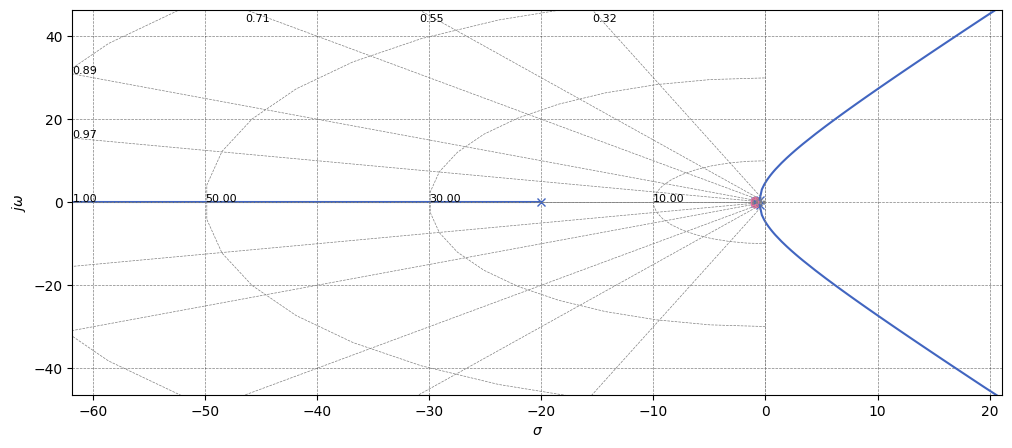

In [6]:
rl = ct.root_locus(sys)
plt.title('')
plt.xlabel('$\sigma$')
plt.ylabel('$j\omega$')
plt.savefig('curves/rl1.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


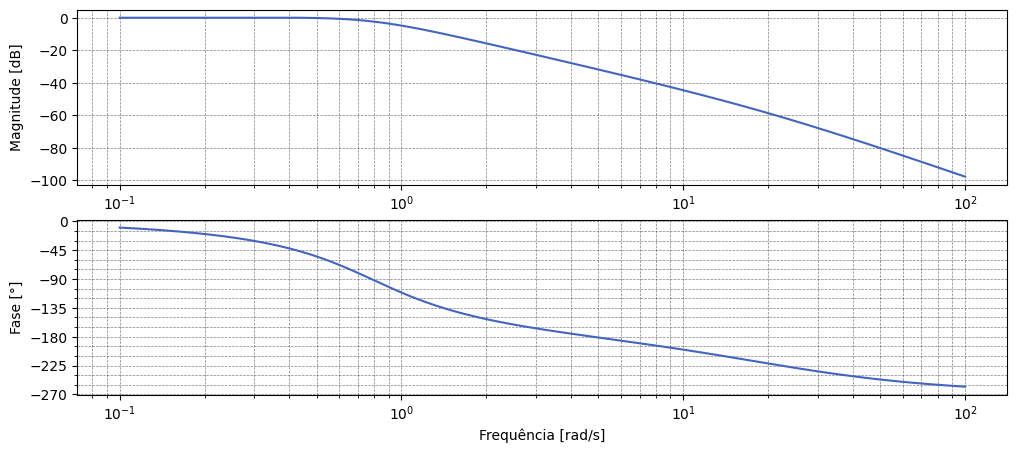

In [7]:
bd = ct.bode(sys, dB=True)
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [°]')
plt.subplot(2, 1, 1)
plt.ylabel('Magnitude [dB]')
plt.savefig('curves/bd1.eps', dpi=600, transparent=True, bbox_inches='tight')

In [8]:
#Sistema simplificado:
den = ((s-polos[3])*(s-polos[4]))
G_ = (0.6115/den)
G_

TransferFunction(array([0.6115]), array([1.        +0.j, 1.04090985+0.j, 0.61151218+0.j]))

In [9]:
wn = np.sqrt(0.6115)
zeta = (1.041/(2*wn))
tau = (1/(zeta*wn))
st = (4*tau)

print(f'wn \t = \t {wn:.4f}')
print(f'zeta \t = \t {zeta:.4f}')
print(f'tau \t = \t {tau:.4f}')
print(f'st \t = \t {st:.4f}')

wn 	 = 	 0.7820
zeta 	 = 	 0.6656
tau 	 = 	 1.9212
st 	 = 	 7.6849


/home/erick/.local/lib/python3.10/site-packages/control/xferfcn.py:1077: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


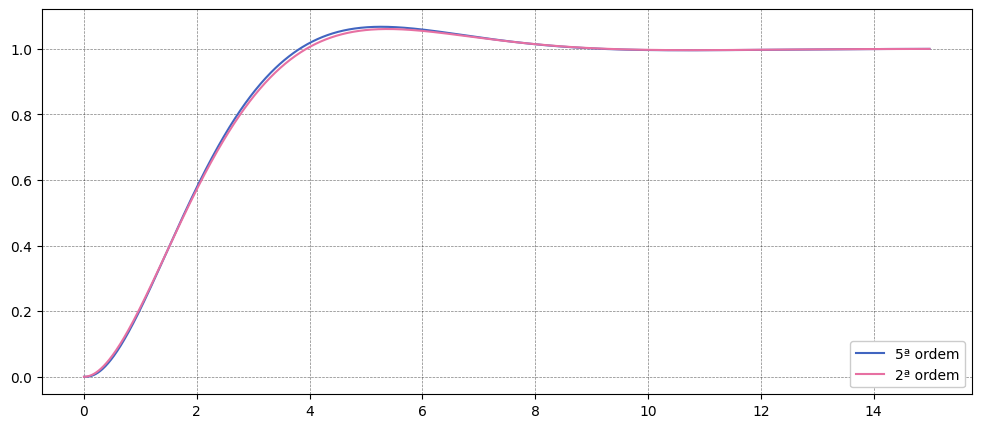

In [10]:
t = np.arange(0, 15, 1e-2)

t, y = ct.step_response(sys, t)
t, y_ = ct.step_response(G_, t)

plt.figure(1)
plt.plot(t, y, label='5ª ordem')
plt.plot(t, y_, label='2ª ordem')
plt.legend(loc='lower right')
plt.savefig('curves/rt1.eps', dpi=600, transparent=True, bbox_inches='tight')